In [1]:
import csv 
import numpy
from scipy import integrate, linalg
from matplotlib import pyplot 
%matplotlib inline

In [2]:
#load main airfoil geometry
with open ('MainFoil_N=50.csv') as infile:
    airfoil_main = numpy.loadtxt(infile, dtype=float, delimiter=',')
    
x_main = numpy.empty((len(airfoil_main),1))
y_main = numpy.empty((len(airfoil_main),1))

for i in range(0, len(airfoil_main)):
    x_main[i] = airfoil_main[i, 0]
    y_main[i] = airfoil_main[i, 1]
    
#load flap geometry 
with open ('FlapFoil_N=100.csv') as infile:
    airfoil_flap = numpy.loadtxt(infile, dtype=float, delimiter=',')
    
x_flap = numpy.empty((len(airfoil_flap),1))
y_flap = numpy.empty((len(airfoil_flap),1))

for i in range(0, len(airfoil_flap)):
    x_flap[i] = airfoil_flap[i, 0]
    y_flap[i] = airfoil_flap[i, 1]
    

(0.0, 1.4000000000000001, -0.25, 0.10000000000000003)

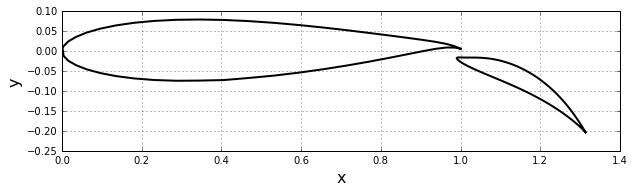

In [4]:
#plot airfoil 
width = 10
pyplot.figure(figsize=(width, width))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.plot(x_main, y_main, color='k', linestyle='-', linewidth=2)
pyplot.plot(x_flap, y_flap, color='k', linestyle='-', linewidth=2)
pyplot.axis('scaled', adjustable='box')

In [5]:
class Panel:
    
    def __init__(self, xa, ya, xb, yb):
        
        self.xa, self.ya = xa, ya #panel start 
        self.xb, self.yb = xb, yb #panel end
        
        self.xc, self.yc = (xa+xb)/2, (ya+yb)/2 #panel center 
        self.length = numpy.sqrt((xb-xa)**2 + (yb-ya)**2) #panel length
        
        #angle between x axis and panel's normal - orientation 
        if xb-xa <= 0.0:
            self.beta = numpy.arccos((yb-ya)/self.length)
        elif xb-xa > 0.0:
            self.beta = numpy.pi + numpy.arccos(-(yb-ya)/self.length)
            
        #panel location 
        if self.beta <= numpy.pi:
            self.loc = 'upper' #upper surface
        else:
            self.loc = 'lower' #lower surface 
            
        self.sigma = 0.0 #strength of source
        self.vt = 0.0 #tangential velocity 
        self.cp = 0.0 #pressure coeff

In [9]:
def define_panels(x, y, N):
    
    x_ends, y_ends = x, y 
    panels = numpy.empty(N, dtype=object)
    for i in range(N):
        panels[i] = Panel(x_ends[i], y_ends[i], x_ends[i+1], y_ends[i+1])
        
    return panels

In [10]:
N=40
panels_main = define_panels(x_main, y_main, N)
panels_flap = define_panels(x_flap, y_flap, N)

(0.0, 1.4000000000000001, -0.25, 0.10000000000000003)

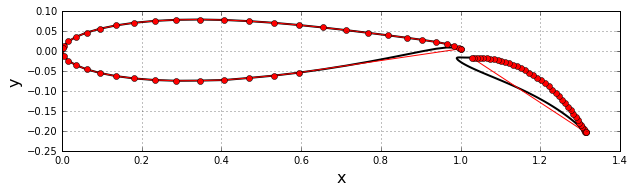

In [15]:
width=10
pyplot.figure(figsize=(width, width))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

pyplot.plot(x_main, y_main, color='k', linestyle='-', linewidth=2)
pyplot.plot(x_flap, y_flap, color='k', linestyle='-', linewidth=2)

pyplot.plot(numpy.append([panel.xa for panel in panels_main], panels_main[0].xa), 
           numpy.append([panel.ya for panel in panels_main], panels_main[0].ya), 
           linestyle='-', linewidth=1, marker='o', markersize=6, color='r')
pyplot.plot(numpy.append([panel.xa for panel in panels_flap], panels_flap[0].xa), 
           numpy.append([panel.ya for panel in panels_flap], panels_flap[0].ya), 
           linestyle='-', linewidth=1, marker='o', markersize=6, color='r')

pyplot.axis('scaled', adjustable='box')
